# Практична робота №8
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5

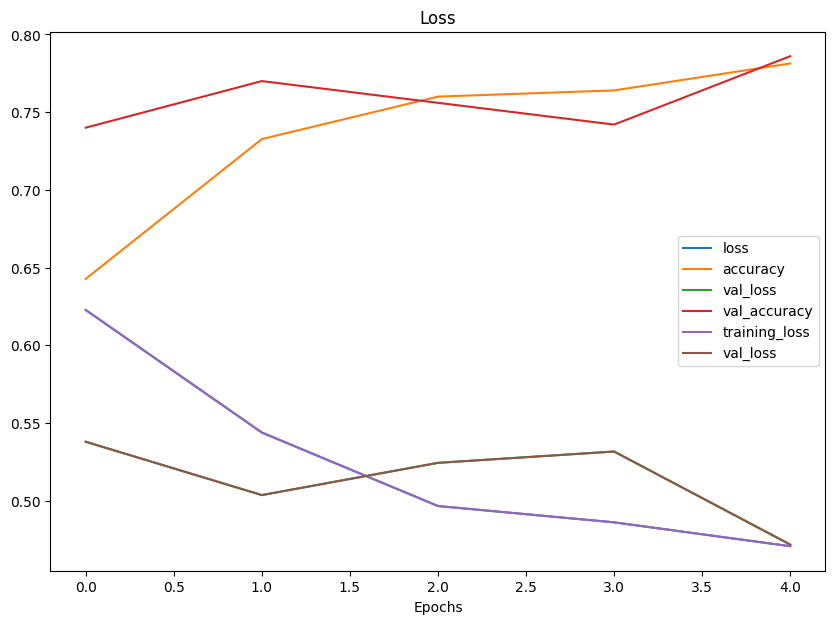

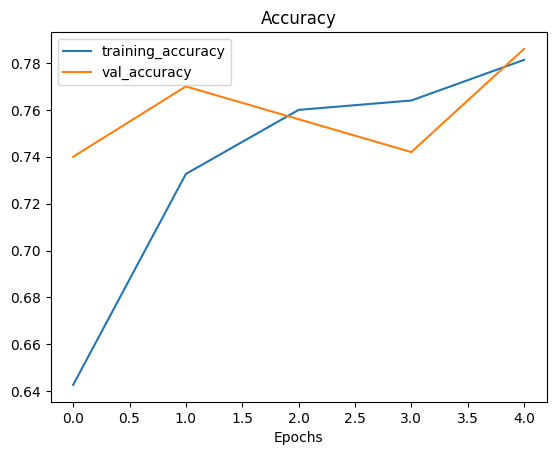

In [5]:
'''import zipfile
import os

#Path to the downloaded archive
zip_file_path = "C:/university/3year/intelan/zip_food/archive/10_food_classes_all_data.zip"

#Folder for extracting
extracted_folder = "C:/university/3year/intelan/zip_food/extracted"

#Extracting
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref=zip_ref.extractall(extracted_folder)


train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"'''


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
seed_value = 33
tf.random.set_seed(seed_value)

# Set image dimensions
img_size = (224, 224)
batch_size = 32

#Define training and test directory paths
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

#Assigning our two classes
our_classes=['grilled_salmon', 'ramen']

#Create train and test data generators and preprocess the data (normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=img_size,  #convert all images to be 224 x 224
                                               batch_size=batch_size,  #number of images to process at a time 
                                               class_mode="binary",  #type of problem we're working on (salmon vs ramen)
                                               seed=seed_value,
                                               classes=our_classes)  #specify the list of class subdirectories (considering only these specified classes during training)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=img_size,
                                               batch_size=batch_size,
                                               class_mode="binary",
                                               seed=seed_value,
                                               classes=our_classes)

#Create a CNN model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10, 
                               kernel_size=3,  #can also be (3, 3)
                               activation="relu", 
                               input_shape=(224, 224, 3)),  #first layer specifies input shape (height, width, colour channels)
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,  #pool_size can also be (2, 2)
                                  padding="valid"),  #padding can also be 'same'
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")  #binary activation output
])

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Display the model summary
model.summary()

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

#Plot the training curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))

#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, steps=len(test_data))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

#Plot the training and test data
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

#Check out the loss curves of our model
plot_loss_curves(history)